In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('D:\\Data_sets\\time_series\\Electric_Production.csv')
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [6]:
df.rename(columns={'DATE': 'date', 'IPG2211A2N': 'units'}, inplace=True)

In [7]:
df

,date,units
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   units   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [11]:
df['date']=pd.to_datetime(df.date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    397 non-null    datetime64[ns]
 1   units   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [13]:
df.set_index('date', inplace=True)

In [14]:
df

,units
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


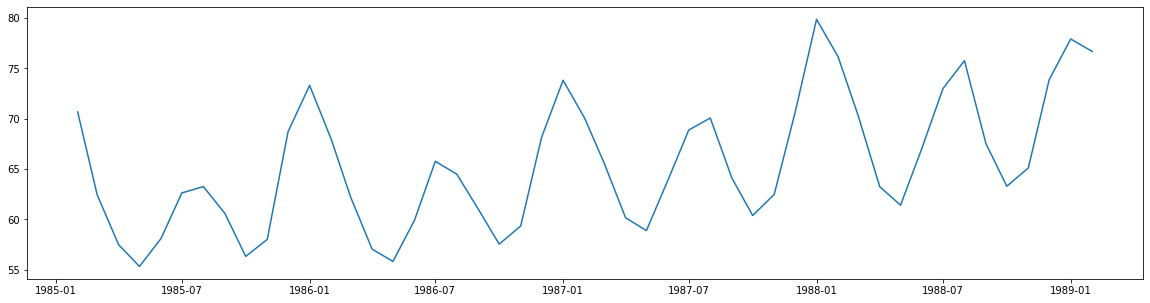

In [16]:
plt.plot(df[1:50])

## Moving Average method

In [19]:
rollingseries = df[1:50].rolling(window=5)

rollingmean = rollingseries.mean() #we can compute any statistical measure

print(rollingmean.head(10))


               units
date                
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
1985-06-01  60.79982
1985-07-01  59.18946
1985-08-01  59.34912
1985-09-01  59.97176
1985-10-01  60.17182
1985-11-01  60.15384


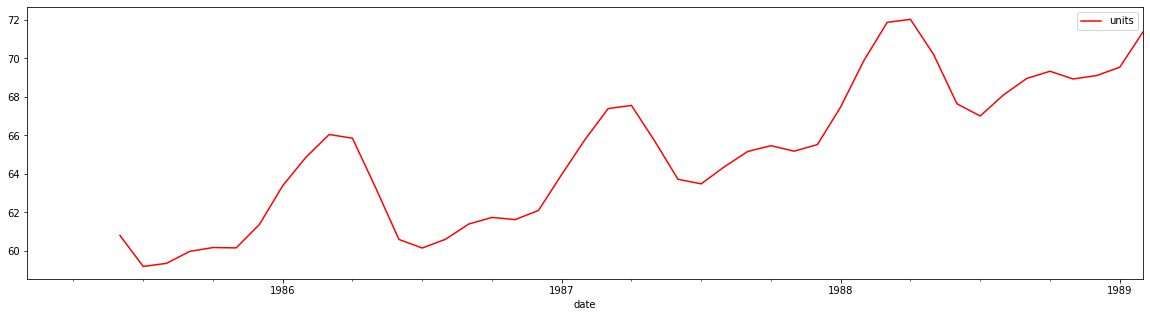

In [20]:
rollingmean.plot(color="red")
plt.show()

## Simple Exponential Smoothing

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [27]:
## if we give high value of aplha then our curve follow more like original curve

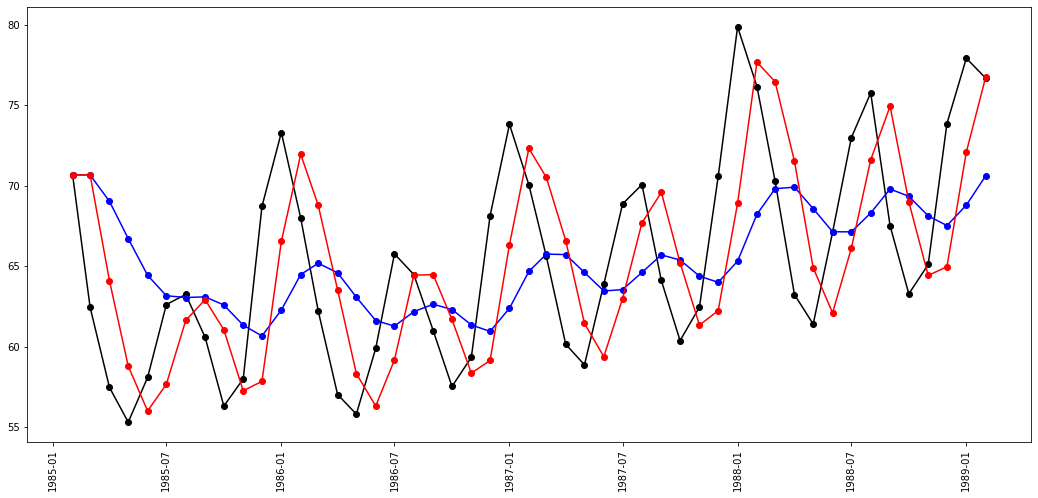

In [26]:
data = df[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)

plt.figure(figsize=(18, 8))
plt.plot(df[1:50], marker='o', color="black")

plt.plot(fit1.fittedvalues, marker="o", color="b")

plt.plot(fit2.fittedvalues, marker="o", color="r")

plt.xticks(rotation="vertical")
plt.show()

## Holt method for exponential smoothing

In [29]:
from statsmodels.tsa.api import Holt

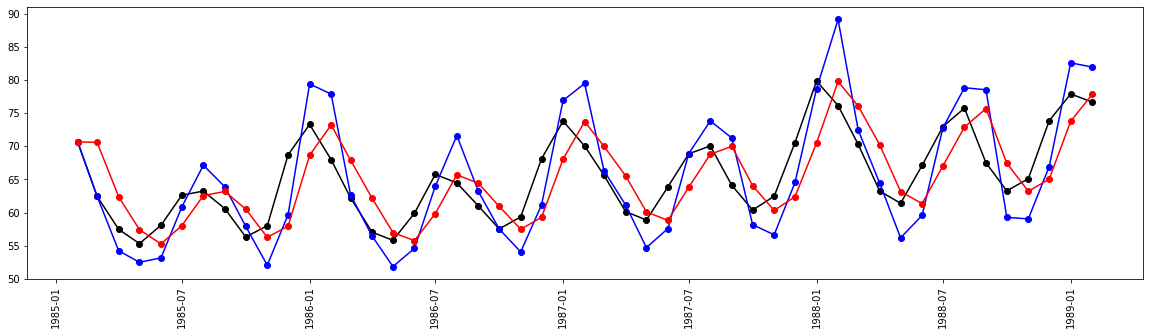

In [30]:
fit1 = Holt(data).fit()  #linear trend

fit2 = Holt(data, exponential=True).fit()  #exponential trend

plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')

plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.show()